In [32]:
import tensorflow as tf

In [33]:
print(type(tf))
print(tf.__version__)

<class 'module'>
2.2.0


In [34]:
a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
print(c)

tf.Tensor(3, shape=(), dtype=int32)


In [35]:
d = tf.multiply(a,b)
e = tf.add(c,b)
f = tf.subtract(d,e)

In [36]:
#sess = tf.Session() # Older TF Versions 
sess = tf.compat.v1.Session()

In [13]:
#outs = sess.run(f)

RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [37]:
# Build a dataflow graph.
ac = tf.constant([[1.0, 2.0], [3.0, 4.0]])
ad = tf.constant([[1.0, 1.0], [0.0, 1.0]])
ae = tf.matmul(ac, ad)

print(ae)

tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [18]:
# Construct a `Session` to execute the graph.
with tf.compat.v1.Session() as sess:

  # Build a dataflow graph.
  sc = tf.constant([[1.0, 2.0], [3.0, 4.0]])
  sd = tf.constant([[1.0, 1.0], [0.0, 1.0]])
  se = tf.matmul(sc, sd)

  # Execute the graph and store the value that `e` represents in `result`.
  result = sess.run(se)
  print(result)
sess.close()

[[1. 3.]
 [3. 7.]]


In [39]:
tf_var_str = tf.Variable("Hi Rohit - Assign a String to this tf_var_str",tf.string)
print(type(tf_var_str)) ## <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
tf_var_int = tf.Variable(1234,tf.int32)
print(type(tf_var_int)) ## same class as var_str ## <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>

<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [40]:
tf.rank(tf_var_str) ## RANK == 0 --and thus its a SCALAR == numpy=0

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [41]:
tf_var_str1 = tf.Variable(["Hi Rohit"],tf.string)
tf.rank(tf_var_str1) ## RANK == 1 -as its got 1 Dimension -1 ARRAY - 1 LIST -- and thus NOT a SCALAR == numpy=1

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [32]:
tf_var_str1_a = tf.Variable(["Hi Rohit","Still-Rank-1"],tf.string)
tf.rank(tf_var_str1_a) ## RANK == 1 -as its got 1 Dimension -1 ARRAY - 1 LIST with 2 STR ELEMENTS -- and thus NOT a SCALAR == numpy=1

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [48]:
tf_var_str2 = tf.Variable([["Hi Rohit"], ["Assign a String to this tf_var_str"]],tf.string)
tf.rank(tf_var_str2) ## RANK == 2 -as its got 2 Dimensions-2 ARRAYS - 2 LISTS -- and thus NOT a SCALAR == numpy=2

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [28]:
from tensorflow import keras
print(type(keras))
fashion_mnist_data = keras.datasets.fashion_mnist
print(type(fashion_mnist_data))
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist_data.load_data()

<class 'module'>
<class 'module'>


In [42]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

print(train_images.shape) # 60K images - each is 28X28 pixels
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [43]:
print(train_labels)
train_labels
## np.uint8 - uint8_t - Unsigned integer (0 to 255)
## https://numpy.org/devdocs/user/basics.types.html

[9 0 0 ... 3 0 5]


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [44]:
print(test_labels)
test_labels

[9 2 1 ... 8 1 5]


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

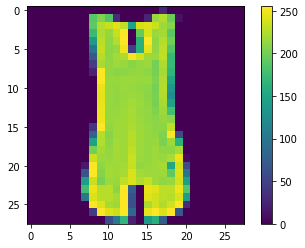

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[3])
plt.imshow(train_images[4])
plt.colorbar()
plt.gca().grid(False)

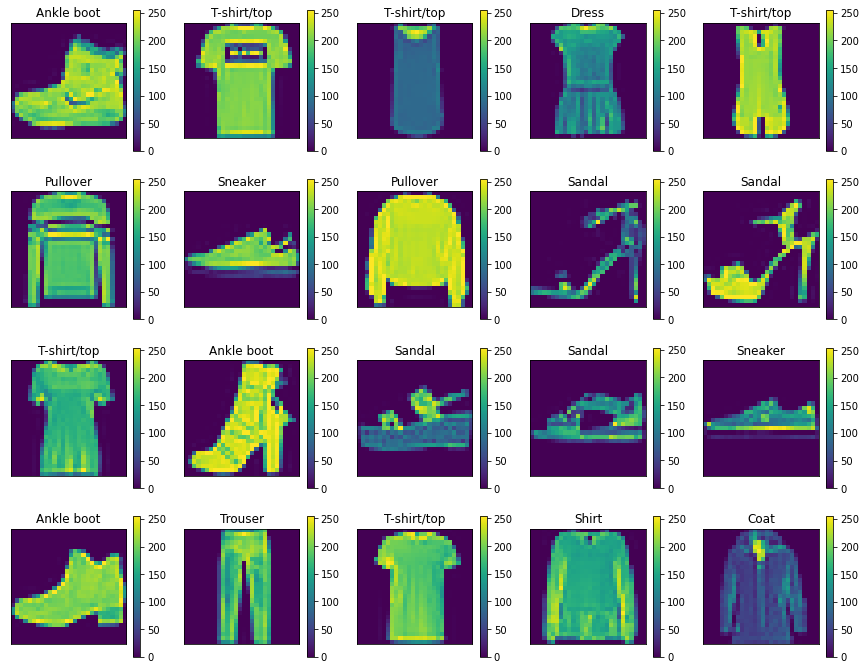

In [46]:
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(5,5, i+1)
    plt.imshow(train_images[i] )
    plt.title( labels[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.grid(False)
plt.show()

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), # Line up all - Image Pixel intensity , Value Rows - into One Long vector
    #keras.layers.Dense(128, activation=tf.nn.relu), ## Can Add Another Hidden Layer 
    keras.layers.Dense(128, activation=tf.nn.relu), # Dense layer - 1st Layer of 128 Neurons - with 'relu' Activation Function
    keras.layers.Dense(10, activation=tf.nn.softmax) # Dense layer -2nd and last Layer of 10 Neurons - 'softmax' Activation Function
    ]) 

# Within ML there is an issue with - Memorization(OverFitting) and Generalization (Patterns recognized well but No OverFitting)
# Smaller Networks will have less chance of OverFitting - as they will have less opportunity to Memorize our Training Data 

# Softmax layer- is a Probability Distribution- over all Classes- that an image could be classified as,here images can be classified into 10 Pre-defnined Labels. 
# Mostly all internal layers can have RELU as the Activation Function. 

print(model) ##<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4199793400>
print(type(model)) ## <class 'tensorflow.python.keras.engine.sequential.Sequential'>

<class 'tensorflow.python.keras.engine.sequential.Sequential'>


In [59]:
# BackPropogation and Gradient Decent - is managed by the Optimizers 
model.compile(optimizer = 'adam',
              loss= 'sparse_categorical_crossentropy', #
              metrics= ['accuracy'])


In [60]:
model.fit(train_images,train_labels,epochs=5)
## Loss - Lower is better
## Epoch - How many times are we Training - for what Duration are we Training on the Training Set 
## Accuracy - Higher the better . 
## If Accuracy for Train and Testing Sets is very much DIFF then we dont have a Good Model.
## If both Accuracy Values are LOW -- Train model for more EPOCHS on the Train Set. 

## Train_Accuracy > Test_Accuracy [MODEL OVER-FIT]
## Test_Accuracy  > Train_Accuracy [MODEL UNDER-FIT]

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 3.4898 - accuracy: 0.6940
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6958 - accuracy: 0.7485
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6291 - accuracy: 0.7692
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5969 - accuracy: 0.7837
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5502 - accuracy: 0.8044


In [64]:
predictions = model.predict(test_images)
print(predictions[1])
predictions[1]

[1.1396686e-03 1.5579623e-03 2.2263190e-01 3.0386467e-03 4.6605718e-01
 2.0161982e-15 3.0461645e-01 2.9177251e-23 9.5820840e-04 1.7161438e-17]


array([1.1396686e-03, 1.5579623e-03, 2.2263190e-01, 3.0386467e-03,
       4.6605718e-01, 2.0161982e-15, 3.0461645e-01, 2.9177251e-23,
       9.5820840e-04, 1.7161438e-17], dtype=float32)

In [61]:
print(type(tf))

print(type(keras.Sequential))

from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPooling2D,BatchNormalization
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import TensorBoard,EarlyStopping
import pandas as pd
from IPython.display import display
from sklearn.metrics import classification_report
from keras.utils import np_utils
import numpy as np
from keras.optimizers import Adam

<class 'module'>
<class 'type'>


ModuleNotFoundError: No module named 'keras'

In [20]:
with tf.compat.v1.Session() as sess:
    fetches = [a,b,c,d,e,f]
    outs = sess.run(fetches)

AttributeError: Tensor.graph is meaningless when eager execution is enabled.